# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2023
## Домашнее задание 3. Робастная статистика. Доверительное оценивание.
### Дедлайн --- 14 ноября 2023 23:59

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.


В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека `scipy.stats`. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook c:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде,
* собственно кодом,
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается **в 10 баллов**.

## Пожалуйста, не переименовывайте этот ноутбук

In [1]:
import numpy as np
from scipy import stats as sps
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
sns.set(style="darkgrid", font_scale=1.4)
warnings.filterwarnings('ignore')

%pylab inline
%matplotlib inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


*Условие задания*: Великая ордалия продолжает свой путь на север, однако адепты доселе неизвестной магии - Текне используют своё искусство, чтобы вмешаться в отлаженную работу имперских статистических оценок параметров, меняя им часть данных. Теперь необходимо давать такие оценки, которые выдержат фокусы волшебников консульта, чтобы Ордалия смогла дойти до Голготтерата!

Судьба многомилионной армии теперь в Ваших руках!

## Задача 1

Эта задача посвящена *робастному* оцениванию. Это такой раздел статистики, который изучает, как сильно оценки зависят от выбросов и других *неверных* данных и как построить оценки, которые выдерживают шумы.

1) Сгенерируйте выборку из трех распределений: нормального, Лапласа и Коши размера `N=500`.

Далее для всех графиков в этом задании используйте обозначенные цвета для каждого из распределений (даже если графики будут на разных осях). То есть если график касается нормального распределения то рисуйте его синим цветом.

2) Постройте график плотности распределения для всех трех распределений на одних осях.

1) Мы будем оценивать параметр сдвига каждого из распределений. Сделайте предположение о том, для каких распределений параметр сдвига будет оценён точнее при помощи среднего и медианы. Докажите Ваши предположения теоретически и экспериментально. Моделировать оценки в этот раз не нужно, достаточно по одной выборке произвести оценивание и проверить его точность.

**Ответ:**

In [2]:
#Эксперименты с оценкой средним и медианы


3) Часто, в реальной жизни, мы сталкиваемся с данными в которых есть выбросы возникшие, например, из-за опечаток. Пусть в выборке содержится 99 точек на интервале $[0;1]$ и один элемент равный 300. Тогда среднее значение нашей выборки будет не меньше трех. Ясно, что так дело не пойдет, что же делать?

Можно использовать медиану или **усеченное среднее**.

**Усеченное среднее порядка $\alpha$** это среднее составленное из выборки от которой отрезаны $\alpha$ и $1 - \alpha$ квантили. Как ее получить?


1.   Отсортировать выборку
2.   Отрезать первые и последние ($\alpha \cdot \text{размер выборки}$) элементов выборки
3.   Посчитать среднее полученной выборки

Напишите функцию для подсчета этой статистики. Реализуйте усечённое среднее для одной выборки, но разных $\alpha$. На одних осях постройте распределение оценки для разных $\alpha$. Как оно изменяется?

In [3]:
import math

def truncated_mean(sample, alpha=0.3):
  sample.sort()
  size = len(sample)
  sample = sample[int(alpha * size) : int((1 - alpha) * size)]
  truncated_mean = np.mean(sample)
  return truncated_mean

4) Постройте график квадрата разности каждой из оценок и истинного значения параметра в зависимости от роста размера выборки для разных $\alpha$. Сделайте выводы, какие оценки точнее.

**Теорема**
Пусть распределение симметрично относительно нуля и имеет одну моду в нуле, тогда асимптотическая дисперсия усеченного среднего порядка $\alpha$ может быть выражена по формуле:
$$
\sigma^2(\alpha) = 2\cdot\frac{\int_0^{u_{1 - \alpha}} x^2 dF(x) + \alpha\cdot(u_{1 - \alpha})^2}{(1 - 2\alpha)^2},
$$

где $u_\alpha$ – квантиль порядка $\alpha$.

Вычислите дисперсию и постройте график дисперсии в зависимости от $\alpha$.

*Подсказка.* Для численного интегрирования используйте функцию `quad` из модуля `scipy.integrate`

4.5) Дополнительный пункт на 5 баллов.

Докажите предложенную теорему.

5) Постройте графики для асимптотической дисперсии в зависимости от $\alpha$ для всех трех распределений на назных осях (используйте `plt.subplots(1, 3, figsize=(21,7))`). **Не забудьте про цвета**. Для загаловка графика используйте `ax[i].set_title`, для заголовка всей картинки используйте `fig.suptitle`. Сравните результаты с теоретической

6) Breakdown point в статистике называется такое наибольшее число x от 0 до 100, что если изменить x% значений выборки, то значение оценки не потеряет в точности. Эквивалентно, если заменить хотя бы x+1% значений, можно получить сколь угодно плохую оценку.

Предположите, как Breakdown point зависит параметра $\alpha$.

Ответ:

И проверьте своё предположение моделированием. Будем считать, что вместо произвольных x% выборки будет записано какое-то заранее подобранное достаточно большое число с положительным или отрицательным знаком.

7) Для каждого распределение на отдельном графике постройте значение трех оценок: среднего, медианы и усученного среднего порядка $0.35$. Для усеченного среднего проведите линию пунктиром (`fmt="--"`), для медианы точечками (`fmt=":"`). **Не забудьте про цвета**. То есть цвета на одном графике одинаковые, разные оценки отличает только формат линии.

**Ниже посчитайте все оценки необходимые для всех распределений**

**Нормальное распределение**

**Распределение Лапласа**

**Распределение Коши**

Проанализируйте полученные графики. Проанализируйте графики дисперсий оценок. Сделайте выводы.

**Опциональная часть для самых смелых (20 баллов)**

Мы знаем, что существует Оценка Максимального правдоподобия:

$\hat{\theta} = argmin_{\theta}(-log(f_{\theta}(x)))$, $f_{\theta}(x)$ --- правдоподобие выборки. В таком же виде можно выписать и оценки средним, медианой и усечённым средним:

$\hat{\theta} = argmin_{\theta}(\sum_{i=1}^n\rho(x_i - \theta))$.

В общем случае, такая оценка называется обобщённой оценкой максимального правдоподобия или $M$-оценкой. Функция $\rho$ называется функцией влияния.

1) Как должна выглядеть функция $\rho$, чтобы результатом было усечённое среднее?

Ответ:

2) Эквивалентно задачу оптимизации можно писать в виде системы уравнений $(\sum_{i=1}^n\psi(x_i - \theta)) = 0$. Сравните два определения и скажите, какое из них шире (определяет больше возможных оценок) и как они связаны.

Ответ:

3) Самое интересное. Для трёх распределений из первой части постройте M-оценки для разных функций $\rho$ или $\psi$. Ищите максимум градиентным спуском, а ноль функции --- методом Ньютона.

Примеры функций влияния можно взять вот тут: https://en.wikipedia.org/wiki/Robust_statistics#M-estimators

Ещё можно попросить в чате Том Древних Заклинаний (книжку по робастной статистике) и прочитать там главу 3, где есть примеры M- и L- оценок (что такое L-оценка при желании можете узнать там же сами)

4) Сравните результаты, полученные для трёх распределений и разных функций влияния.

5) Оцените Breakdown point предложенных функций. Сделайте вывод о том, как взаимосвязаны точность оценки и Breakdown point.

Сделайте единый вывод о робастном оценивании:

*Дисклеймер: * 20 баллов будет ставиться только в случае, если Вы попробуете хотя бы 5 существенно различающихся функций влияния и построите хотя бы одну L-оценку (без которой будет 15), а так же укажете, в каких оценках лучше точность и лучше Breakdown Point. В идеале нужно решить трейдофф между точностью и робастностью.

# Задача 2

## Wine dataset

Да, аспект-император взял с собой лучшее вино Трёх Морей и пьёт его, пока идёт битва! В этой задаче Вам предлагается поработать с реальными данными и провести оценивания состава вина.

Давайте загрузим и проанализируем датасет, состоящий из различных показателей для красного вина и оценок сомелье.

In [4]:
# !pip install -q gdown
# !gdown https://drive.google.com/uc?id=1LsNeROfnVQb2ksdtwZvxrZREdy_Z-jta

In [5]:
import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("winequality-red.csv")

In [7]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Поделите вина на три категории по содержанию алкоголя. Добавьте колонку `"category"` со значениями `"low alcohol"`, `"medium alcohol"`, `"high alcohol"` для относительного объемного содержания алкоголя `x<=10`, `10 < x <= 12`, `x > 12` соответственно.

In [8]:
def num_to_category(x):
    if x['alcohol'] <= 10:
        return 'low alcohol'
    elif x['alcohol'] > 10 and x['alcohol'] <= 12:
        return 'medium alcohol'
    else:
        return 'high alcohol'

In [9]:
data['category'] = data.apply(lambda x : num_to_category(x), axis=1)

Для каждой категории посчитайте среднее и медиану содержания остаточного сахара (`"residual sugar"`). Сделайте pandas.DataFrame с индексами в виде категории содержания алкоголя и колнками в виде среднего и медианы.

In [10]:
data.groupby('category').aggregate([np.median, np.mean])['residual sugar']

,median,mean
category,,
high alcohol,2.3,2.760993
low alcohol,2.1,2.445984
medium alcohol,2.2,2.592264


Что можно сказать о распределении сахара по этим категориям? О распределении остаточного сахара в целом?

**Ответ:** И по медиане и по среднему видно, что чем больше содержание алкоголя, тем выше содержание сахара. Также видно, что mean значительно больше median, что может говорить о выбросах.

Постройте `boxplot` для остаточного сахара по категориям, полученным ранее на основании доли алкоголя.

Text(0.5, 0, 'Категория')

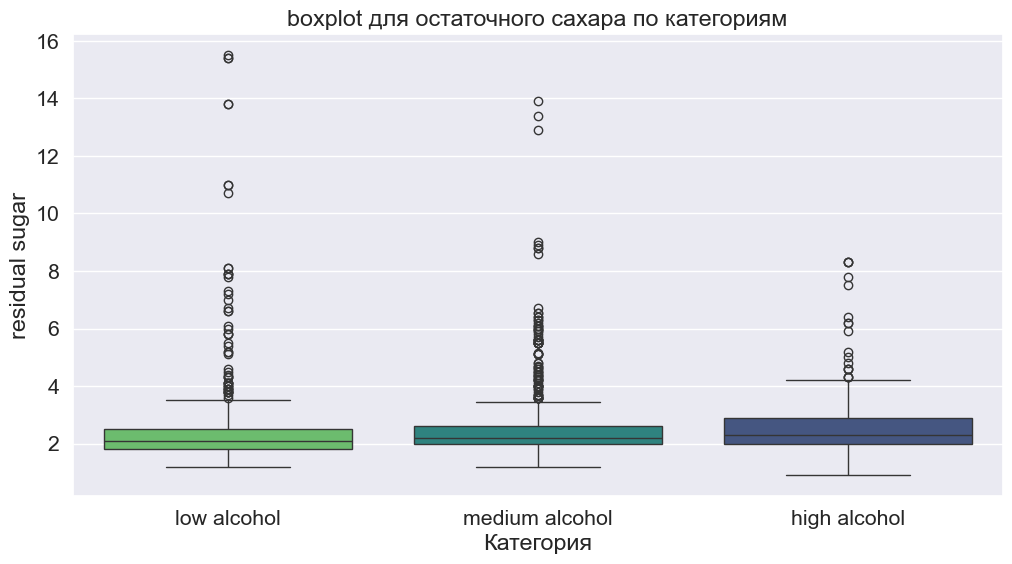

In [11]:
palette = sns.color_palette("viridis", n_colors=3)[::-1]
plt.figure(figsize=(12, 6))
sns.boxplot(x=data.category, y=data['residual sugar'], palette=palette)
plt.title('boxplot для остаточного сахара по категориям')
plt.xlabel('Категория')

Как соотнясятся оценки из предыдущего пункта и график сверху? Что лучше использовать для оценивания содержания сахара: медиану или среднее? Почему?

**Ответ:** Мы видим выбросы, как это и предпалогалось. Очевидно, будем использовать медиану для оценивания, потому что она менее чувствительна к выбросам.

Постройте один `scatterplot` (используйте `seaborn`) для очень хороших и очень плохих вин (`quality == 3`, `quality == 8`) в зависимости от содержания алкоголя (`alcohol` **не** из предыдущего пункта, а из колонки исходного датасета) и от количества лимонной кислоты (`citric acid`). Используйте `palette=[palette[0]]+[palette[-1]]`.

Text(0.5, 1.0, 'ScatterPlot')

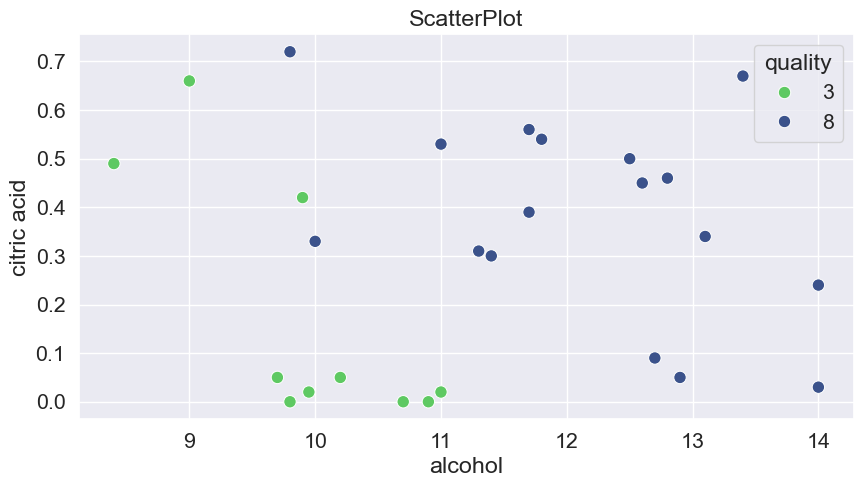

In [12]:
plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=data[(data['quality'] == 3) | (data['quality'] == 8)], 
    x='alcohol', y='citric acid', hue='quality', 
    palette=[palette[0]]+[palette[-1]], s=80
)
plt.title('ScatterPlot')

Найдите ОМП для двух этих распределений в предположении, что обе выбоки из многомерного нормального распределения. Не мудрите, $\mu$ и $\Sigma$ получаются в одну команду через `numpy`. Далее получите плотности для сетки `X`, `Y`. Используйте `sps.multivariate_normal`.

In [13]:
first_sample = data[data['quality'] == 3][['alcohol', 'citric acid']]
second_sample = data[data['quality'] == 8][['alcohol', 'citric acid']]

good_pdf = sps.multivariate_normal(first_sample.mean(), first_sample.corr()).pdf
bad_pdf = sps.multivariate_normal(second_sample.mean(), second_sample.corr()).pdf

Предложите свои робастные (устойчивые к выбросам) оценки параметров $\mu$, $\sigma$, посчитайте их. Сравните результат с ОМП. Какой оценке больше доверия?

Будем использовать усеченное среднее.

Нарисуйте график плотности с линиями контура и нанесите точки выборки. Используйте зеленый цвет для вина плохого качества (`get_density_cmap("Greens")` и `"g"` для точек) и синий для вина хорошего качества (`get_density_cmap("Blues")` и `"b"`). Используйте функции `plt.pcolormesh`, `plt.clabel` и `plt.scatter`. Не забудьте про `plt.xlabel`, `plt.ylabel` и `plt.legend`.

In [14]:
from matplotlib.colors import ListedColormap

def get_density_cmap(name):
    cmap =  plt.get_cmap(name)
    cmap_col = cmap(np.arange(cmap.N))
    cmap_col[:, -1] = np.linspace(0, 1, cmap.N)**2
    return ListedColormap(cmap_col)

Text(0.5, 1.0, 'Плотности распределений')

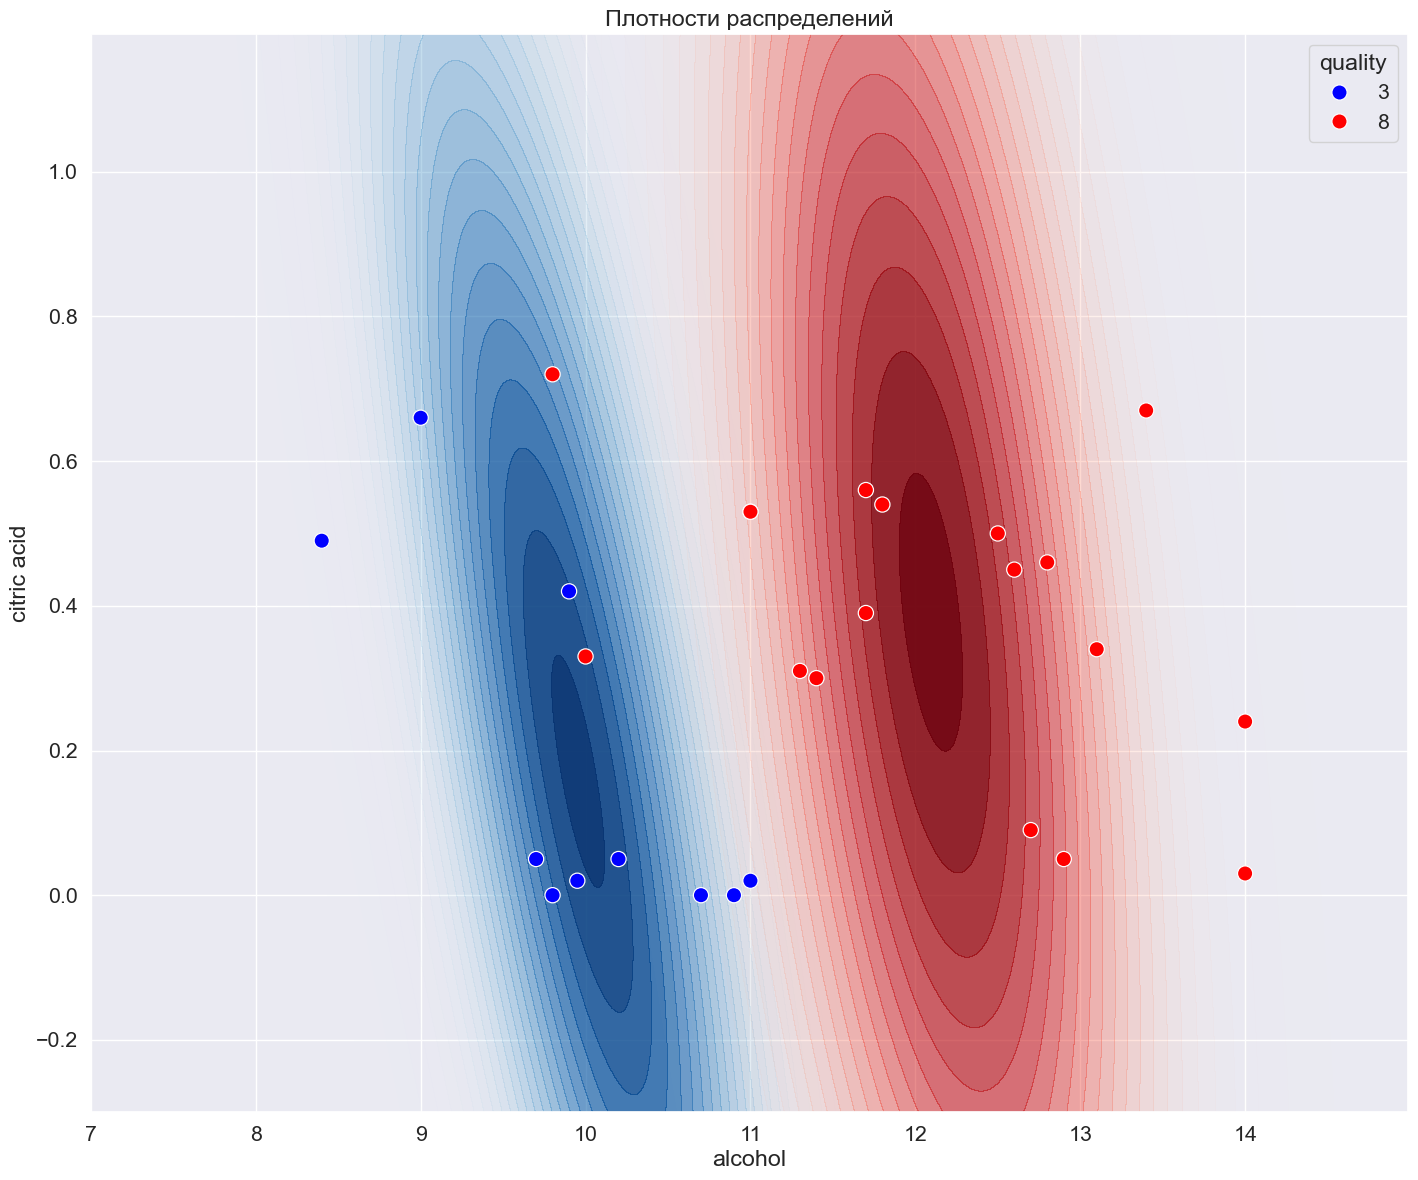

In [15]:
x, y = np.mgrid[7:15:.01, -0.3:1.2:.01]
plt.figure(figsize=(17, 14))
plt.contourf(x, y, good_pdf(np.dstack((x, y))), levels=25, cmap=get_density_cmap('Blues'))
plt.contourf(x, y, bad_pdf(np.dstack((x, y))), levels=25, cmap=get_density_cmap('Reds'))
sns.scatterplot(
    data=data[(data['quality'] == 3) | (data['quality'] == 8)], 
    x='alcohol', y='citric acid', hue='quality', 
    s=120, palette=['blue', 'red']
)
plt.title('Плотности распределений')

Что можно сказать о вине, которому сомелье дали наивысший балл по сравнению с вином, которому дали наименьший балл, основываясь на график выше?

**Ответ:** Чаще всего, наивысшую оценку получают вина, где меньше концетрация лимонной кислоты и алкоголя.

# Задача 3

В случаях, когда ошибка в значении параметра может дорого обойтись, применяют доверительное оценивание. Вместо точечного значения параметра оценкой является отрезок, в который истинное значение параметра попадает с высокой вероятностью.

Сгенерируйте выборку $X_1, ...,X_{100}$ из распределения $P_\theta$.

Для уровня доверия $\alpha = 0.95$ для всех $n \leq 100$
изобразите на графиках в координатах $(n, \theta)$
* Доверительный интервал, построенный по оценке $\widehat{\theta}$ (который, помимо этого, нужно теоретически посчитать и написать)
* График оценки $\widehat{\theta}$
* Точки выборки

Для отрисовки доверительного интервала используйте `plt.fill_between`. Не забывайте про параметр `alpha`.

Для того, чтобы избежать дублирования кода, рекомендуем написать функцию `draw_confidence_interval`, изображающую на графике все необходимое.

В каждом случае при помощи моделирования проверьте, как часто параметр действительно попадает в свой доверительный интервал (генерируйте выборку выборок, по которой стройте выборку доверительных интервалов)

In [16]:
alpha = 0.95 # Уровень доверия
N = 100
size = 10000

In [17]:
def draw_confidence_interval(title, sample, estimate, low_bound, up_bound):
    plt.figure(figsize=(16, 10))
    grid = 1 + np.arange(N)
    plt.scatter(
        grid, sample, 
        alpha=0.8, s=50, 
        label='sample'
    )
    plt.plot(
        grid, estimate, linewidth=1.5, 
        color='red', 
        label=r'$\hat{\theta}$',
    )
    plt.fill_between(
        x=grid, y1=up_bound, 
        y2=low_bound, alpha=0.3,
        label='Conf interval',
        color=sns.color_palette('Set3')[5]
    )
    plt.xlim((1, N))
    plt.ylim((0, 20))
    plt.legend()
    plt.title(title, fontsize=20)
    plt.xlabel(r'$n$')
    plt.ylabel(r'$\theta$')
    plt.show()

### 1. Равномерное распределение, $\theta = 10$, оценка $\widehat{\theta} = X_{(n)}$

$$
\frac{X_{(n)}} {(\frac{1 + \alpha}{2})^{1 / n}} \le \theta \le \frac{X_{(n)}}{(\frac{1 - \alpha}{2})^{1 / n}}
$$

In [18]:
uniform_sample = sps.uniform(scale=10).rvs(size=N)
uniform_estimate = np.maximum.accumulate(uniform_sample)

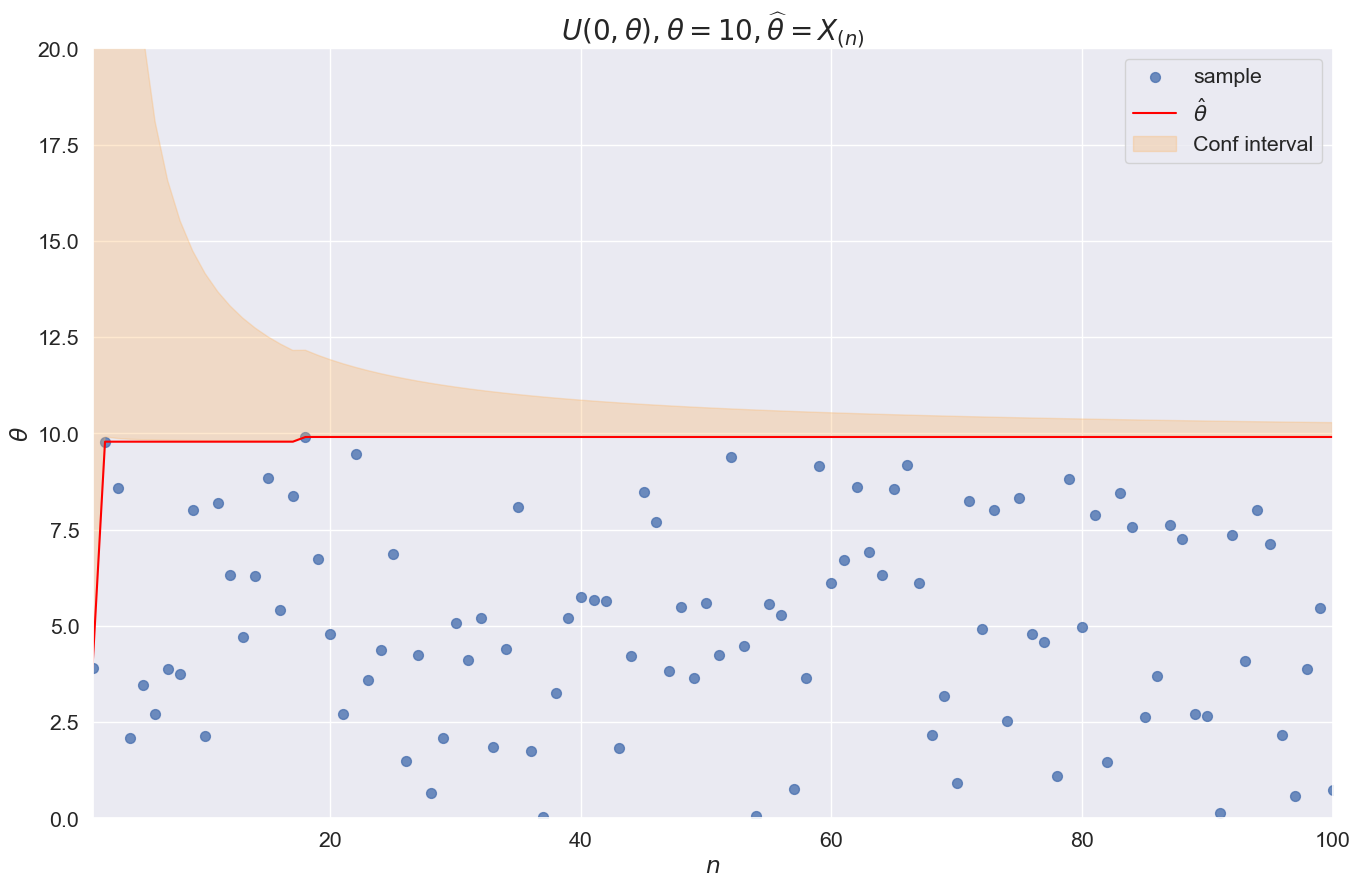

In [19]:
low_bound = uniform_estimate / ((1 + alpha) / 2) ** (1 / np.arange(1, N + 1))
up_bound = uniform_estimate / ((1 - alpha) / 2) ** (1 / np.arange(1, N + 1))
draw_confidence_interval(r'$U(0,\theta), \theta = 10, \widehat{\theta} = X_{(n)}$', uniform_sample, uniform_estimate, low_bound, up_bound)

In [20]:
uniform_prob = 0
for i in range(size):
    uniform_sample = sps.uniform(scale=10).rvs(size=N)
    uniform_prob += (max(uniform_sample) / ((1 + alpha) / 2) ** (1 / N) <= 10 <= max(uniform_sample) / ((1 - alpha) / 2) ** (1 / N))
print(f'Вероятность того, что параметр попадет в доверительный интервал для UNIFROM = {(uniform_prob / size)}')

Вероятность того, что параметр попадет в доверительный интервал для UNIFROM = 0.9474


### 2. Распределение Коши, $\theta = 10$, оценка — медиана

$$
\hat{\mu} - \frac{\pi}{2 \cdot \sqrt{n}} u_{\frac{1 + \alpha}{2}} \le \theta \le \hat{\mu} - \frac{\pi}{2 \cdot \sqrt{n}} u_{\frac{1 - \alpha}{2}}
$$

In [21]:
def median_cumulate(sample):
    return np.array([np.median(sample[:i]) for i in range(1, len(sample) + 1)])

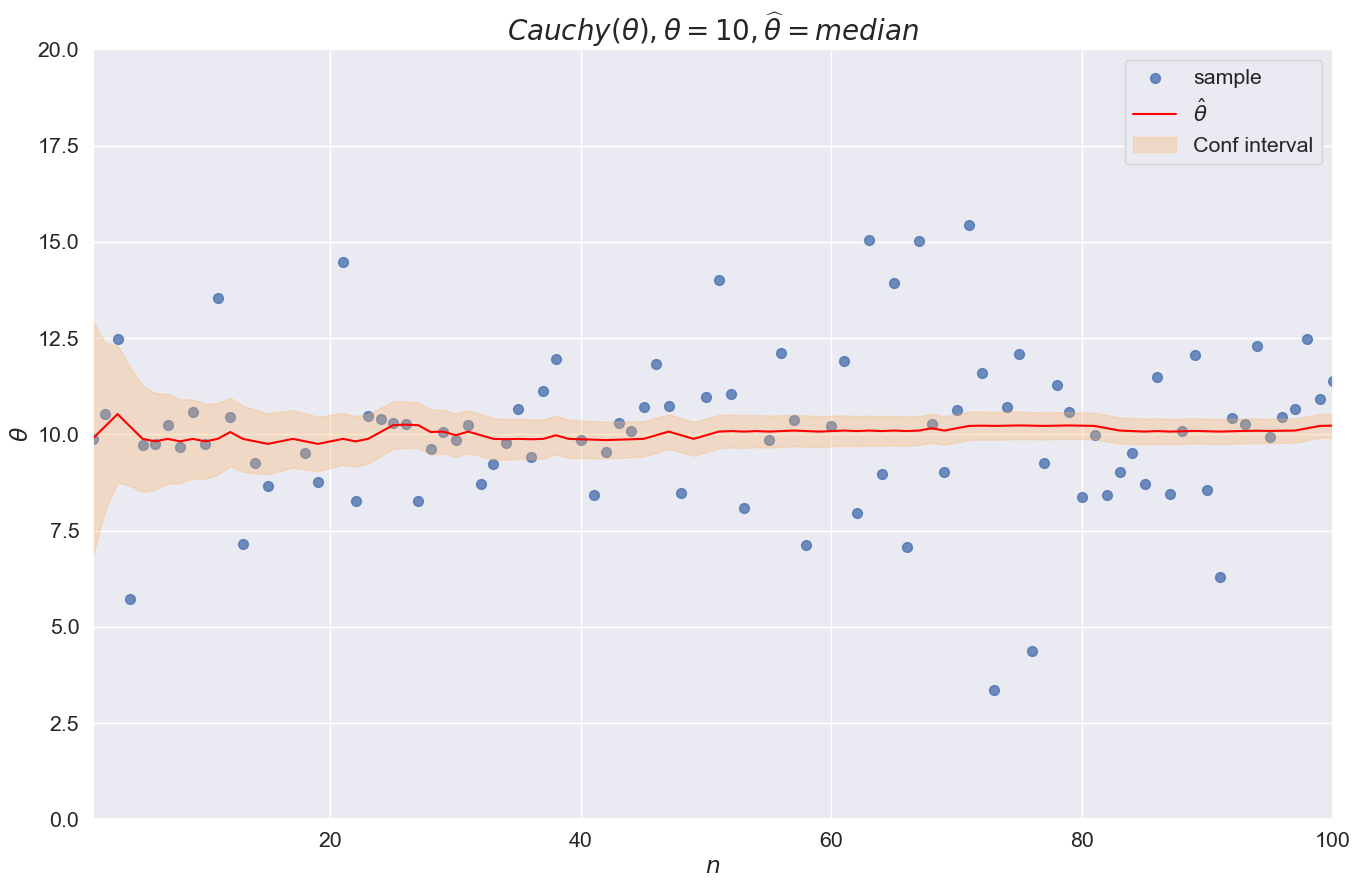

In [22]:
cauchy_sample = sps.cauchy(loc=10).rvs(size=N)
low_bound = median_cumulate(cauchy_sample) - np.pi * sps.norm.ppf((1 + alpha) / 2) / (2 * np.sqrt(np.arange(1, N + 1)))
up_bound = median_cumulate(cauchy_sample) - np.pi * sps.norm.ppf((1 - alpha) / 2) / (2 * np.sqrt(np.arange(1, N + 1)))
draw_confidence_interval(
    r'$Cauchy(\theta), \theta=10, \widehat{\theta}=median$', 
    cauchy_sample, median_cumulate(cauchy_sample), low_bound, up_bound
)

In [23]:
cauchy_prob = 0
for i in range(size):
    sample_cauchy = sps.cauchy(loc=10).rvs(size=N)
    low = np.median(sample_cauchy) - np.pi * sps.norm.ppf((1 + alpha) / 2) / (2 * np.sqrt(N))
    up = np.median(sample_cauchy) - np.pi * sps.norm.ppf((1 - alpha) / 2) / (2 * np.sqrt(N))
    cauchy_prob += (low <= 10 <= up)
print(f'Вероятность того, что параметр попадет в доверительный интервал для CAUCHY = {(cauchy_prob / size)}')

Вероятность того, что параметр попадет в доверительный интервал для CAUCHY = 0.9465


### 3. Распределение Пуассона, $\theta = 10$, оценка $\widehat{\theta} = \overline{X}$

$$\overline{X} - \sqrt{\frac{\overline{X}}{n}} u_{\frac{1 + \alpha}{2}} \le \theta \le \overline{X} - \sqrt{\frac{\overline{X}}{n} } u_{ \frac{1 - \alpha}{2}}$$

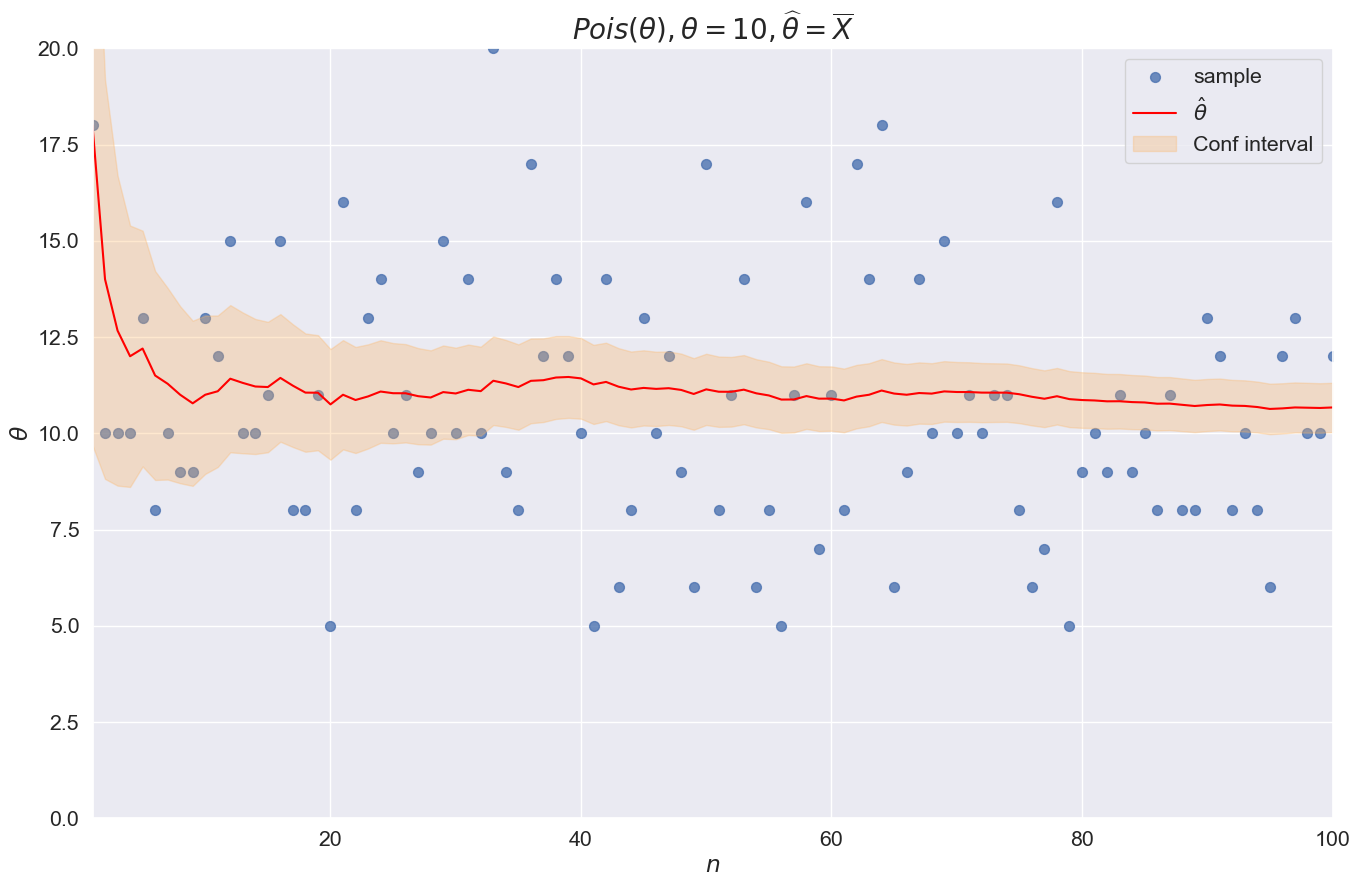

In [24]:
pois_sample = sps.poisson(mu=10).rvs(size=N)
pois_estimate = np.cumsum(pois_sample) / np.arange(1, N + 1)
low_bound = pois_estimate - np.sqrt(pois_estimate / np.arange(1, N + 1)) * sps.norm.ppf((1 + alpha) / 2)
up_bound = pois_estimate - np.sqrt(pois_estimate / np.arange(1, N + 1)) * sps.norm.ppf((1 - alpha) / 2)
draw_confidence_interval(r'$Pois(\theta), \theta=10, \widehat{\theta} = \overline{X}$', pois_sample, pois_estimate, low_bound, up_bound)

In [25]:
pois_prob = 0
for i in range(size):
    pois_sample = sps.poisson(mu=10).rvs(size=N)
    low = np.mean(pois_sample) - np.sqrt(np.mean(pois_sample) / N) * sps.norm.ppf((1 + alpha) / 2)
    up = np.mean(pois_sample) - np.sqrt(np.mean(pois_sample) / N) * sps.norm.ppf((1 - alpha) / 2)
    pois_prob += (low <= 10 <= up)
print(f'Вероятность того, что параметр попадет в доверительный интервал для POIS = {(pois_prob / size)}')

Вероятность того, что параметр попадет в доверительный интервал для POIS = 0.9495


### 4. Гамма-распределение, $(\theta, \lambda) = (10, 3)$, $\lambda$ известна

$$\frac{\overline{X}}{\lambda + u_{\frac{1+\alpha}{2}} \sqrt{\frac{\lambda}{n}}} \le \theta \le \frac{\overline{X}}{\lambda + u_{\frac{1-\alpha}{2}} \sqrt{\frac{\lambda}{n}}}$$

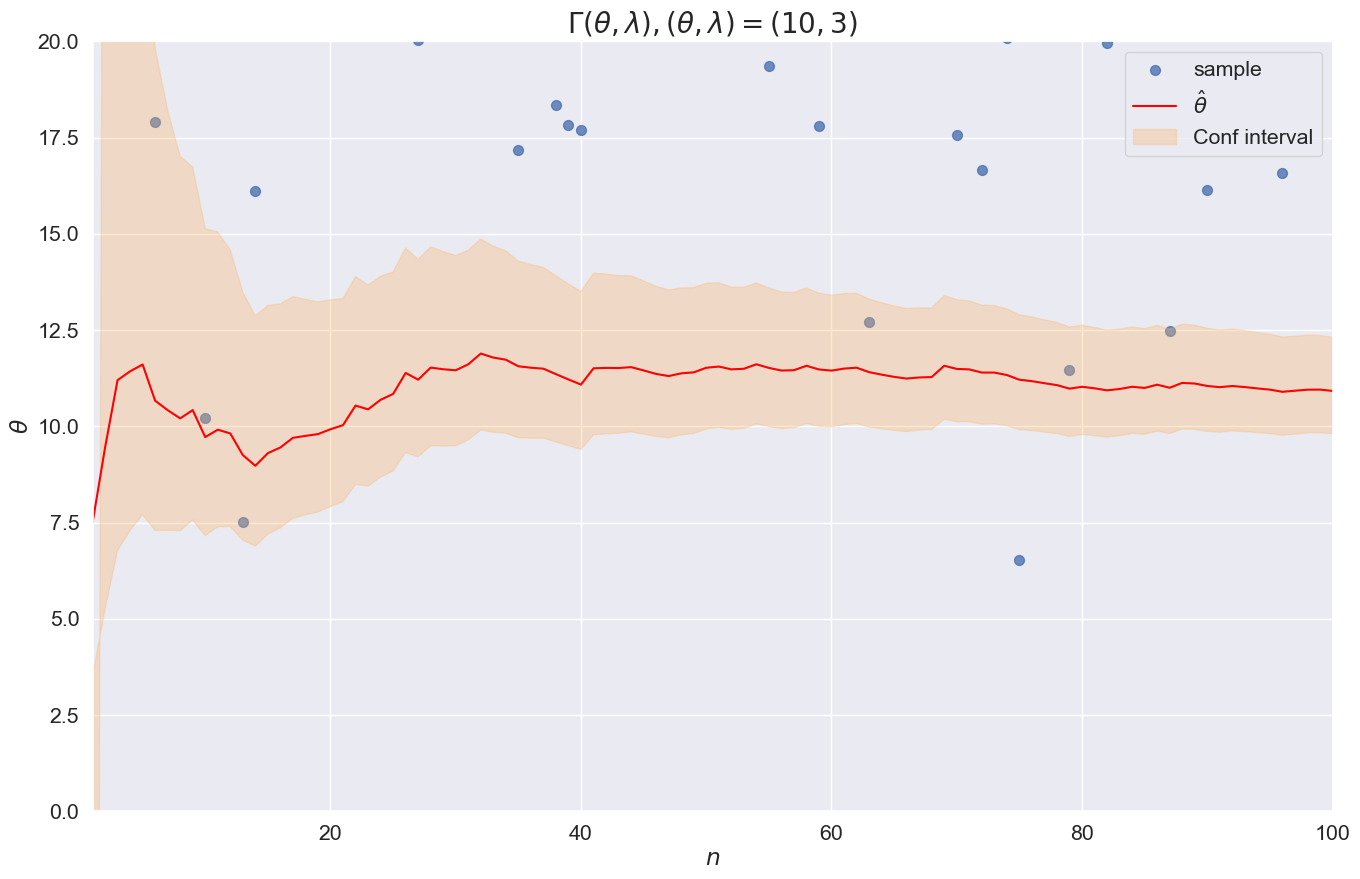

In [26]:
gamma_sample = sps.gamma(a=3, scale=10).rvs(size=N)
gamma_estimate = np.cumsum(gamma_sample) / np.arange(1, N + 1) / 3
low_bound = gamma_estimate * 3 / (3 + np.sqrt(3 / np.arange(1, N + 1)) * sps.norm.ppf((1 + alpha) / 2))
up_bound = gamma_estimate * 3 / (3 + np.sqrt(3 / np.arange(1, N + 1)) * sps.norm.ppf((1 - alpha) / 2))
draw_confidence_interval(r'$\Gamma(\theta, \lambda), (\theta, \lambda) = (10, 3)$', gamma_sample, gamma_estimate, low_bound, up_bound)

In [27]:
gamma_prob = 0
for i in range(size):
    gamma_sample = sps.gamma(a=3, scale=10).rvs(size=N)
    low = np.mean(gamma_sample) / 3 * 3 / (3 + np.sqrt(3 / N) * sps.norm.ppf((1 + alpha) / 2))
    up = np.mean(gamma_sample) / 3 * 3 / (3 + np.sqrt(3 / N) * sps.norm.ppf((1 - alpha) / 2))
    gamma_prob += (low <= 10 <= up)
print(f'Вероятность того, что параметр попадет в доверительный интервал для GAMMA = {(gamma_prob / size)}')

Вероятность того, что параметр попадет в доверительный интервал для GAMMA = 0.9534


Сделайте вывод о том, насколько точен доверительный интервал в каждом случае? Насколько он широк? А что от него ожидается: быть шире или быть уже? От каких свойств распределения зависит ширина?

Вывод: В последнем случае для гамма распределения интервал самый широкий, а вот для распределения Коши жлверителный интервал самый короткий. Также стоит отметить, что ширина довеврительного интервала уменьшается с ростом колисчетва элементов в выборке. Ширина доверительного интервала зависит от самого распределния, размера выборки. Очевидно, что нам нужен интервал маскимально узкий для более точного оценивания.

### Задача 4.

Точный доверительный интервал в условиях войны с чудовищами консульта строить нет ни времени, ни желания. Зато у нас есть целых два кандидата на его место: маги с востока предлагают использовать асимптотический доверительный интервал, как завещал их философ Айенсис, а маги с запада --- бутстрепный, как написано в их священных текстах. А какой лучше?

В этой задаче мы построим точный, асимптотический и бутстрепный доверительный интевалы для нормального распределения и сравним их.

Пусть $X_1, \dots, X_n$ — выборка из нормального распределения со средним $a$ и дисперсией $\sigma^2$, причем $\sigma$ неизвестна. Выпишите формулы

* точного доверительного итервала уровня доверия $\alpha$ для $a$:

* асимптотического доверительного итервала уровня доверия $\alpha$ для $a$

* бутстрепного доверительного итервала уровня доверия $\alpha$ для $a$


Точный доверительный интервал
$$\overline{X} - \frac{z_{({\alpha} + 1) / 2} \sigma}{\sqrt{N}} \lt a \lt \overline{X} + \frac{z_{({\alpha} + 1) / 2} \sigma}{\sqrt{N}}$$

Асимптотический доверительный интервал:
$$\lim_{N \rightarrow \infty} P(\overline{X} - \frac{z_{({\alpha} + 1) / 2} \sigma}{\sqrt{N}} \lt a \lt \overline{X} + \frac{z_{({\alpha} + 1) / 2} \sigma}{\sqrt{N}}) = \alpha$$

Бутстрепный доверительный интвервал:
$$\left(\theta^*_{(\lfloor k (1 + \alpha) / 2 \rfloor)}, \theta^*_{(\lceil k (1 - \alpha) / 2 \rceil)} \right)$$

In [28]:
def conf_interval(sample, alpha= 0.95):
    x = np.var(sample) * sps.norm.ppf((1 + alpha) * 0.5) / np.sqrt(len(sample))
    return np.mean(sample) + x, np.mean(sample) - x

def as_conf_interval(sample, alpha= 0.95):
    x = np.var(sample) * sps.t.ppf((((1 + alpha) * 0.5) / np.sqrt(len(sample))), len(sample) - 1)
    return np.mean(sample) + x, np.mean(sample) - x

def bootstrap_conf_interval(sample, alpha=0.95, size=100):
    def generate_bootstrap_samples(sample, size=100):
        return np.array([np.random.choice(sample, size=len(sample), replace=True) for _ in range(size)])

    sort_est = sorted([np.mean(x) for x in generate_bootstrap_samples(sample)])
    return (
        sort_est[int(np.ceil(size * (1 - alpha) / 2))],
        sort_est[int(np.floor(size * (1 + alpha) / 2))]
    )

Для $n=30, \,a = 0$ постройте __на одном графике__ все три доверительных интервала, а также отметьте линией истинное значение $a$.

In [45]:
def draw_confidence_interval(sample, estimate, low_bound, up_bound, name, color):
    grid = 1 + np.arange(N)
    plt.fill_between(
        x=grid, y1=up_bound, 
        y2=low_bound, alpha=0.8,
        label=name,
        color=color
    )
    plt.xlim((1, N))
    plt.ylim((8, 12))
    plt.legend()
    plt.xlabel(r'$n$')

In [46]:
n = N = 30
norm_sample = sps.norm(loc=10).rvs(size=N)
norm_estimate = np.cumsum(norm_sample) / np.arange(1, N + 1)

In [47]:
conf, as_conf, bootstrap_conf = [], [], []
for i in range(1, n + 1):
    up, low = conf_interval(norm_sample[:i])
    conf.append((low, up))
for i in range(1, n + 1):
    up, low = as_conf_interval(norm_sample[:i])
    as_conf.append((low, up))
for i in range(1, n + 1):
    up, low = bootstrap_conf_interval(norm_sample[:i])
    bootstrap_conf.append((low, up))   
conf, as_conf, bootstrap_conf = np.array(conf), np.array(as_conf), np.array(bootstrap_conf)

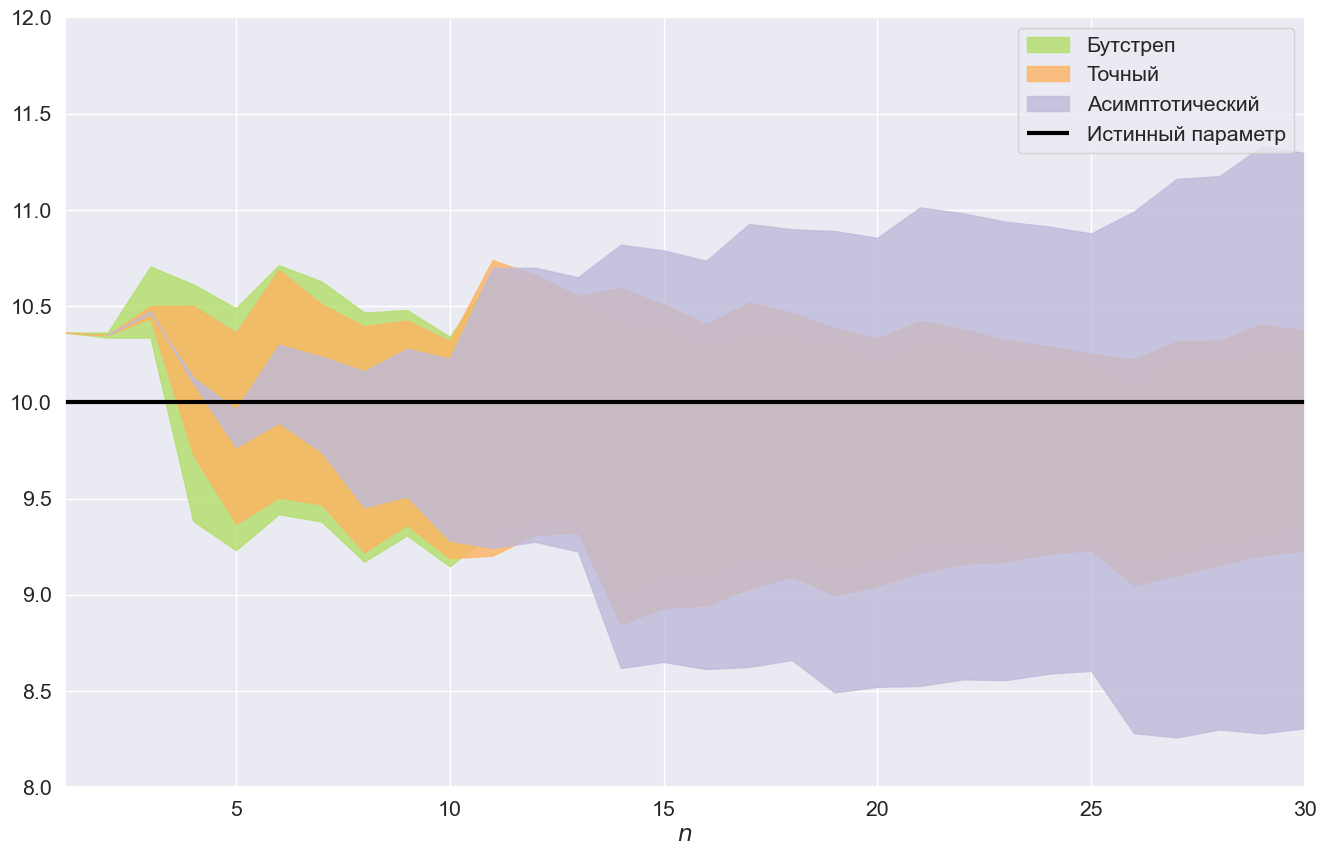

In [49]:
plt.figure(figsize=(16, 10))
draw_confidence_interval(
    norm_sample, norm_estimate, [i[0] for i in bootstrap_conf], [i[1] for i in bootstrap_conf], 
    'Бутстреп', sns.color_palette('Set3')[6]
)
draw_confidence_interval(
    norm_sample, norm_estimate, [i[0] for i in conf], [i[1] for i in conf], 
    'Точный', sns.color_palette('Set3')[5]
)
draw_confidence_interval(
    norm_sample, norm_estimate, [i[0] for i in as_conf], [i[1] for i in as_conf], 
    'Асимптотический', sns.color_palette('Set3')[2]
)
plt.hlines(y=10, xmin=0, xmax=30, linewidth=3, color='black', label='Истинный параметр')
plt.legend()

Моделированием посчитайте вероятность того, что истинное значение параметра попадёт в интервал. В каком случае оно ближе к теоретическому (среди двух неточных интервалов)?

Сделайте вывод о том, когда какой интервал использовать и как их использовать, чтобы получить хороший результат.

Вывод:

## Задача 5

И снова, реальные данные.

В этой задаче мы проанализируем изменение индекса качества воздуха (air quality index, AQI) для двух мегаполисов Индии за последние годы. Данные взяты с Kaggle (https://www.kaggle.com/rohanrao/air-quality-data-in-india)

In [33]:
!gdown https://drive.google.com/uc?id=1Y_mE_jlEF82UDf41l1LFMDHX_LHvF2SC

zsh:1: no matches found: https://drive.google.com/uc?id=1Y_mE_jlEF82UDf41l1LFMDHX_LHvF2SC


Загрузите файл `city_day.csv`. Нам понадобятся столбцы `City`, `Date` и `AQI`. При этом учтите, что:
* В дальнейшем мы будем работать с датами, поэтому используйте аргумент `parse_dates` чтобы корректо их распарсить
* Данные содержат пропуски, которые нужно удалить

Для удобства сохраните в отдельные поля `Month` и `Year` соответственно год и месяц, когда производились замеры

Нас будут интересовать два города: Мумбаи (Mumbai) и Калькутта (Kolkata). Сохраните данные по этим двум городам для всех днней с 1 июля 2018 года включительно

In [34]:
data = pd.read_csv('city_day.csv', parse_dates=['Date'], usecols=['City', 'AQI', 'Date'])
data = data.dropna()
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data.head()

,City,Date,AQI,Year,Month
28,Ahmedabad,2015-01-29,209.0,2015,1
29,Ahmedabad,2015-01-30,328.0,2015,1
30,Ahmedabad,2015-01-31,514.0,2015,1
31,Ahmedabad,2015-02-01,782.0,2015,2
32,Ahmedabad,2015-02-02,914.0,2015,2


In [35]:
data = data[data['Date'] >= '2018-07-01']
mumbai_city = data[data['City'] == 'Mumbai'].reset_index(drop=True)
kolkata_city = data[data['City'] == 'Kolkata'].reset_index(drop=True)

In [36]:
len(mumbai_city), len(kolkata_city)

(721, 732)

В предыдущих задачах мы строили доверительные интервалы в предположении, что выборка взята из параметрического семейства распределений. Но что делать в случае, когда подобное предположение сделать нельзя? Оказывается, в этом случае можно строить доверительный интервал с помощью бутстрепа.

Пусть $X_1, \dots, X_n$ — выборка, для которой мы хотим оценить некоторую величину $\theta$. Построим $k$ бутстепных выборок, и получим по ним оценки $\theta^*_1, \dots, \theta^*_k$. Отсортируем их, чтобы получить вариационный ряд $\theta^*_{(1)}, \dots, \theta^*_{(k)}$. Тогда получим, что
$$
C^* = \left(\theta^*_{(\lfloor k (1 + \alpha) / 2 \rfloor)},
\theta^*_{(\lceil k (1 - \alpha) / 2 \rceil)} \right)
$$
будет (приблизительным) доверительным интервалом для $\theta$ уровня доверия $\alpha$.

Для каждого месяца с июля 2018 по июнь 2020 включтельно постройте бутстрепный доверительный интервал для __среднего значения AQI__. В этом вам помогут следующие вспомогательные функции:

In [37]:
def bootstrap_conf_interval(sample, alpha=0.95, size=1000):
    def generate_bootstrap_samples(sample, size = 1000):
        return np.array([np.random.choice(sample, size=len(sample), replace=True) for _ in range(size)])
    sort_est = sorted([np.mean(x) for x in generate_bootstrap_samples(sample)])
    return (
        sort_est[int(np.ceil(size * (1 - alpha) / 2))],
        sort_est[int(np.floor(size * (1 + alpha) / 2))]
    )

In [38]:
def plot_conf_interval(dates_grid, conf_interval, mean_arr, city_name, color):
    plt.fill_between(
        dates_grid,
        *conf_interval.T,
        alpha=0.25,
        color=color
    )
    plt.scatter(dates_grid, mean_arr, color=color, label=city_name)
    plt.xticks(rotation='vertical')
    plt.xlabel('month')
    plt.ylabel('AQI')
    plt.legend()

Постройте на одном графике доверительные интервалы для Мумбаи и Калькутты. Также отметьте точками на графике истинный средний AQI и соедините точки линиями. Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

In [39]:
dates_grid = pd.date_range(start='2018-07-01', end='2020-06-01', freq='m')
# dates = np.array([np.array(dates.year), np.array(dates.month)]).T
dates_grid

DatetimeIndex(['2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31',
               '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28',
               '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
               '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
               '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29',
               '2020-03-31', '2020-04-30', '2020-05-31'],
              dtype='datetime64[ns]', freq='M')

In [40]:
mumbai_conf_interval, kolkata_conf_inteerval = [], []
mumbai_mean, kolkata_mean = [], []

for curr_date in dates_grid:
    curr_data_mumbai = mumbai_city[(mumbai_city['Month'] == curr_date.month) & (mumbai_city['Year'] == curr_date.year)]
    curr_data_kolkata = kolkata_city[(kolkata_city['Month'] == curr_date.month) & (kolkata_city['Year'] == curr_date.year)]
    mumbai_conf_interval.append(bootstrap_conf_interval(curr_data_mumbai.AQI.to_numpy()))
    kolkata_conf_inteerval.append(bootstrap_conf_interval(curr_data_kolkata.AQI.to_numpy()))
    mumbai_mean.append(np.mean(curr_data_mumbai.AQI))
    kolkata_mean.append(np.mean(curr_data_kolkata.AQI))
mumbai_conf_interval, kolkata_conf_inteerval = np.array(mumbai_conf_interval), np.array(kolkata_conf_inteerval)
mumbai_mean, kolkata_mean = np.array(mumbai_mean), np.array(kolkata_mean)

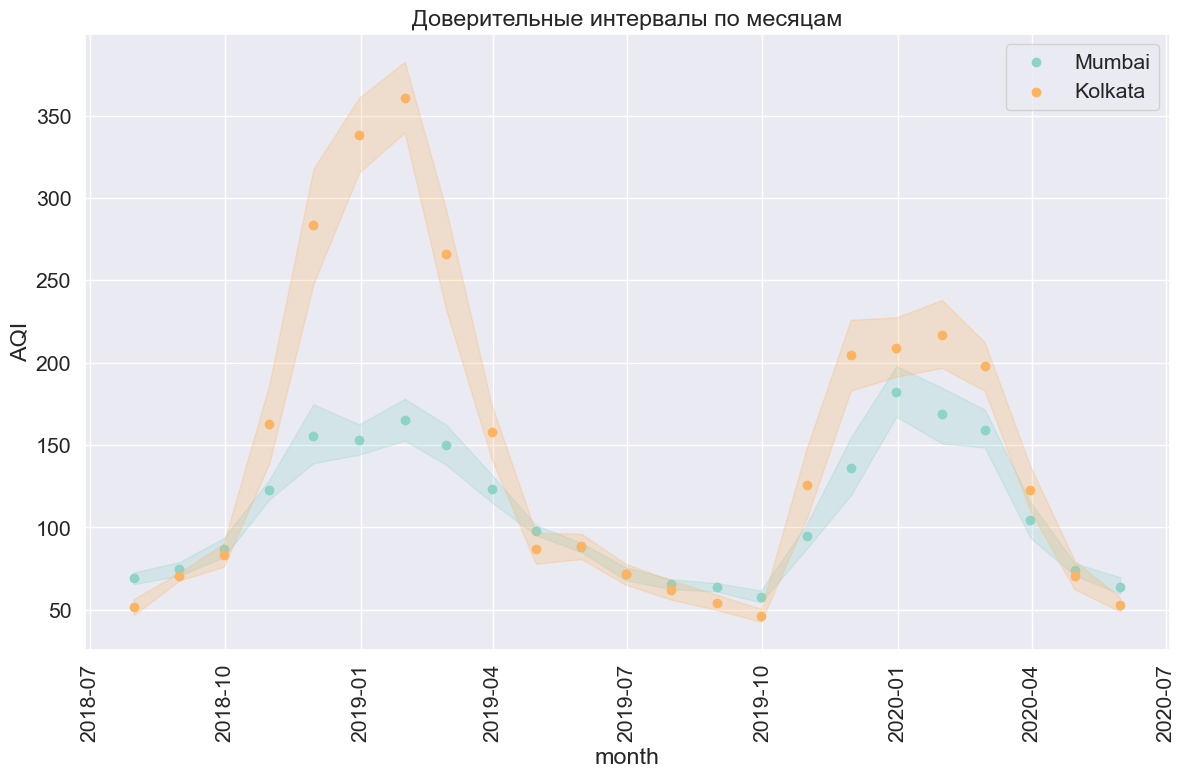

In [41]:
plt.figure(figsize=(14, 8))
plot_conf_interval(dates_grid, mumbai_conf_interval, mumbai_mean, 'Mumbai', sns.color_palette('Set3')[0])
plot_conf_interval(dates_grid, kolkata_conf_inteerval, kolkata_mean, 'Kolkata', sns.color_palette('Set3')[5])
plt.title('Доверительные интервалы по месяцам')
plt.show()

Посмотрите на получившийся график. Видны ли в нем какие-либо закономерности? С чем они могут быть связаны?

Дисперсия не очень высокая. Видно зависимоть от времени года. Зимой AQI достигает своего пика. Также видно общую динамику по ухудшению качества воздуха за последние 2 года для города Kolkata, в Mumbai ситуцию немного лучше и стабильнее, воздух по качетву примерно одинаковый за последние 2 года, если сравнивать по месяцам.

Теперь давайте сравним качество воздуха в апреле 2019 и апреле 2020 годов. Постройте __на одном графике__
* доверительные интервалы для апреля 2019 и апреля 2020 для Мумбаи
* истинные средние значения (с помощью `plt.hlines`)
* точки выборки

Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

То же самое сделайте для Калькутты.

In [42]:
def plot_month_conf_interval(sample, grid, city, year, color):
    plt.fill_between(
        grid, *bootstrap_conf_interval(sample), alpha=0.25, 
        label= city + '. ' + year + ' April. Conf interval', color=color
    )
    plt.hlines(y=np.mean(sample), xmin=1, xmax=30, label=city + ' Mean', color=color)
    plt.scatter(grid, sample, color=color)
    plt.ylim(30, 170)
    plt.xlabel('Days')
    plt.ylabel('AQI')
    plt.legend()

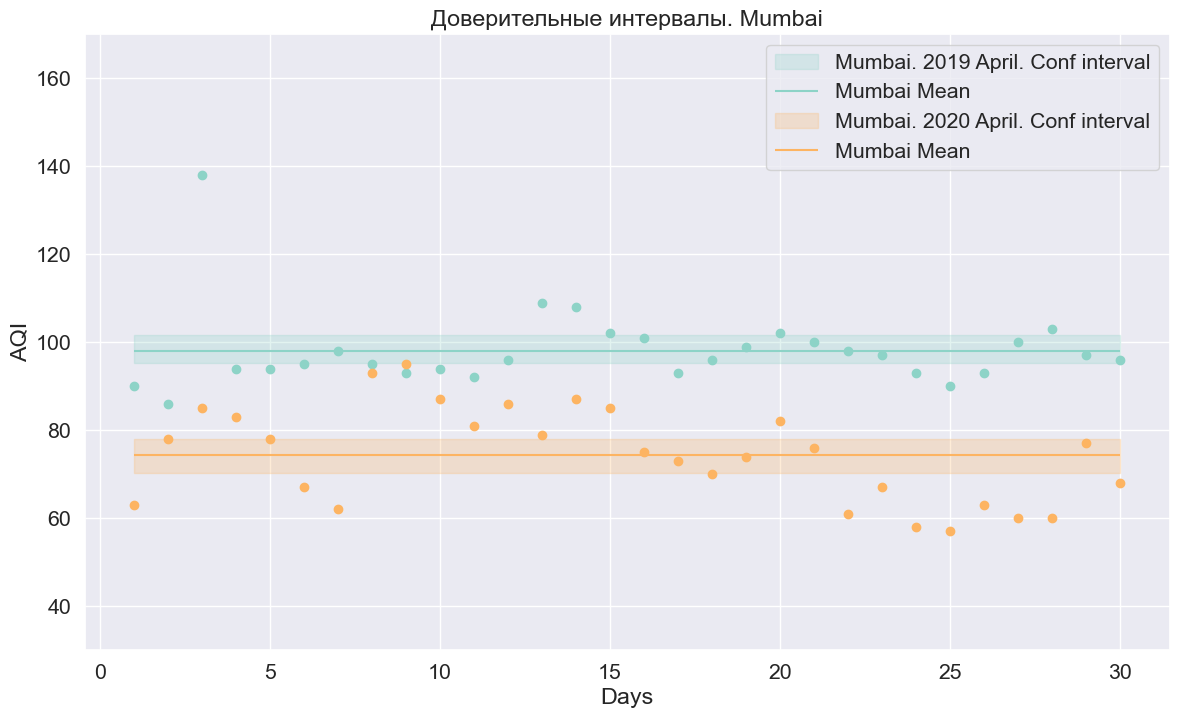

In [43]:
april_data_2019_mumbai = mumbai_city[(mumbai_city['Month'] == 4) & (mumbai_city['Year'] == 2019)]
april_data_2020_mumbai = mumbai_city[(mumbai_city['Month'] == 4) & (mumbai_city['Year'] == 2020)]

plt.figure(figsize=(14, 8))
plot_month_conf_interval(april_data_2019_mumbai.AQI, np.arange(1, 31), 'Mumbai', '2019', sns.color_palette('Set3')[0])
plot_month_conf_interval(april_data_2020_mumbai.AQI, np.arange(1, 31), 'Mumbai', '2020', sns.color_palette('Set3')[5])
plt.title('Доверительные интервалы. Mumbai')
plt.show()

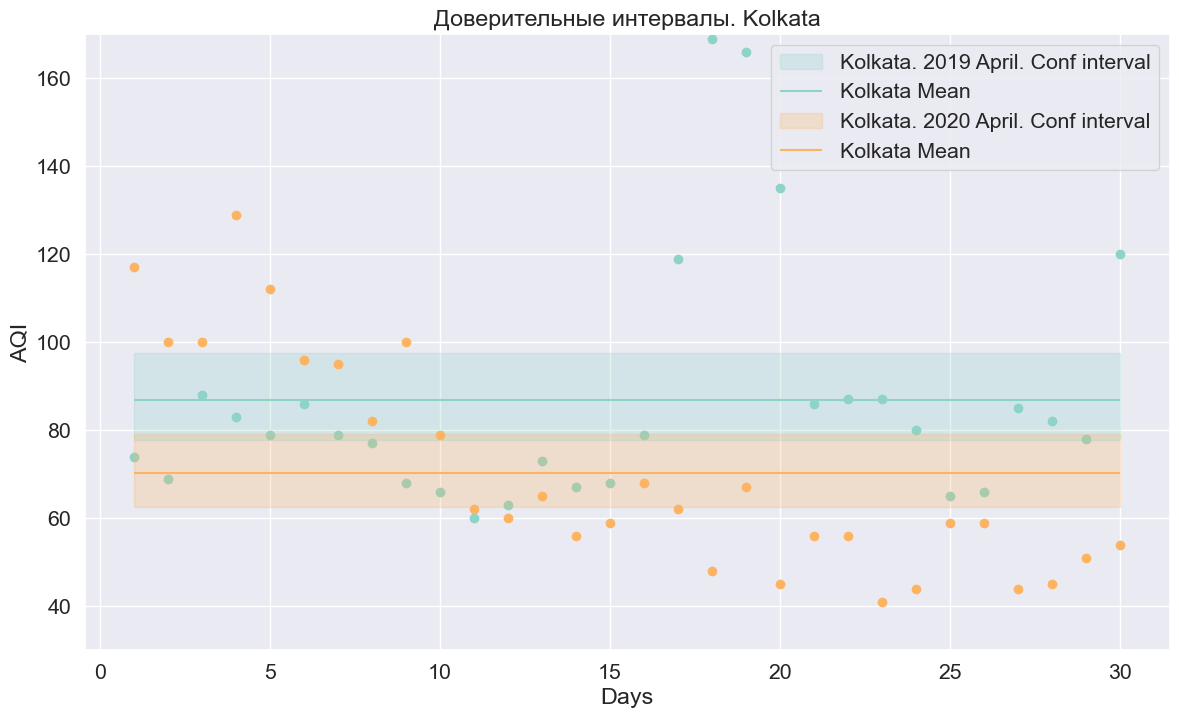

In [44]:
april_data_2019_kolkata = kolkata_city[(kolkata_city['Month'] == 4) & (kolkata_city['Year'] == 2019)]
april_data_2020_kolkata = kolkata_city[(kolkata_city['Month'] == 4) & (kolkata_city['Year'] == 2020)]

plt.figure(figsize=(14, 8))
plot_month_conf_interval(april_data_2019_kolkata.AQI, np.arange(1, 31), 'Kolkata', '2019', sns.color_palette('Set3')[0])
plot_month_conf_interval(april_data_2020_kolkata.AQI, np.arange(1, 31), 'Kolkata', '2020', sns.color_palette('Set3')[5])
plt.title('Доверительные интервалы. Kolkata')
plt.show()

Сделайте выводы. Что можно сказать про доверительные интервалы в каждом из случаев? Какие прикладные выводы о загрязнении воздуха можно сделать из Ваших результатов?

Доверительные интервалы для первого случая работают достаточно неплохо, во втором случае графики выглядят намного хуже. Мы можем сказать, что в обоих городах качество воздуха стало хуже за год в том же месяце. Также из графика видно, что в городе Mumbai качество воздуха в течении апреля ведет себя достаточно стабильно и не сильно меняется, при это в Kolkata ситуация менее предказуема в апреле, потому что очень много значений сильно отличаются от среднего.